# Aprendizaje Automático No Supervisado

El algoritmo descubre en los datos de entrada y de forma autónoma: características, regularidades, correlaciones y categorías

## Reducción de dimensionalidad

### Análisis de componentes principales

El análisis de componentes principales (**PCA**) es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables ("componentes") no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que describen, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos. [(...)](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_componentes_principales)

In [1]:
# descarga el dataset
#!mkdir datasets
#!wget -q https://gitlab.com/i3a/datasets/raw/master/datasets/pokemon.csv -O datasets/pokemon.csv

In [6]:
import pandas as pd

df = pd.read_csv("datasets/pokemon.csv")
df.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [7]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

colsElegidas = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
colsEstandarizadas = list( map( lambda x: x + "_z", colsElegidas ) )

for c in colsEstandarizadas:
    df[c] = 1.0

scaler.fit(df[colsElegidas])
df[colsEstandarizadas] = scaler.transform(df[colsElegidas])


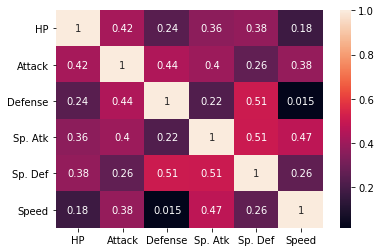

In [9]:
import seaborn as sns

corr = df[ colsElegidas ].corr()
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
            annot = True
           )

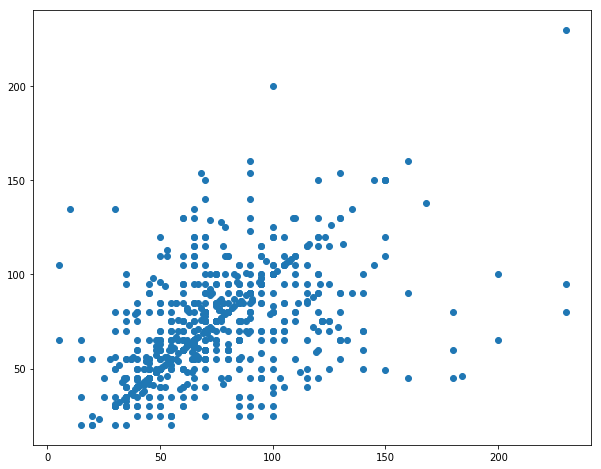

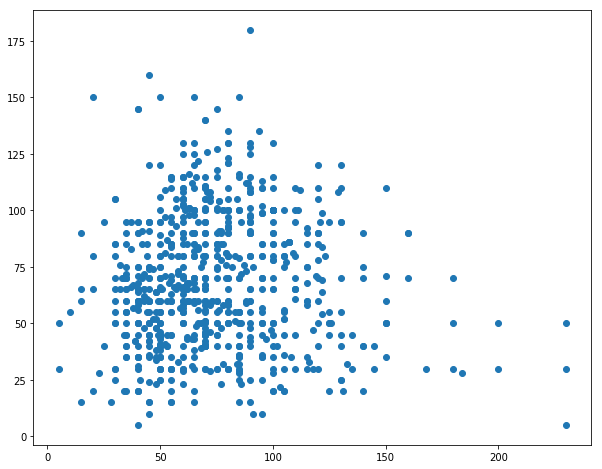

In [10]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 8))
plt.scatter( df['Defense'], df["Sp. Def"] )
plt.show()
f, ax = plt.subplots(figsize=(10, 8))
plt.scatter( df['Defense'], df["Speed"] )
plt.show()

In [11]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit( df[ colsEstandarizadas ] )

display("Varianza por componente:", pca.explained_variance_ratio_)
display("Varianza explicada:",np.sum(pca.explained_variance_ratio_))

'Varianza por componente:'

array([0.45190665, 0.18225358])

'Varianza explicada:'

0.6341602266029072

In [12]:
df["pca_1"] = 0
df["pca_2"] = 0
df[["pca_1","pca_2"]] = pca.transform(df[ colsEstandarizadas ])

In [13]:
df.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def    ...     Generation  Legendary      HP_z  Attack_z  \
0       65       65    ...              1      False -0.950626 -0.924906   
1       80       80    ...              1      False -0.362822 -0.524130   
2      100      100    ...              1      False  0.420917  0.092448   
3      122      120    ...              1      False  0.420917  0.647369   
4       60       50    ...              1      False -1.185748 -0.832419   

   Defense_z  Sp. Atk_z  Sp. Def_z   Speed_z     pca_1     pca_2  
0  -0.797154  -0.239130  -0.248189 -0.801503 -1.556375 -0.021482  
1  -0.347917   0.219560   0.291156 -0.285015 -0.362867 -0.050269  
2   0.293849   0.831146   1.010283  0.403635  1.280152 -0.062720  
3   1.577381   1.503891   1.729409  0.403635  2.620916  0.704263  
4  -0.989683  -0.392027  -0.787533 -0.112853 -1.758284 -0.706179  

[5 rows x 21 columns]

In [14]:
pca.components_

array([[ 0.38988584,  0.43925373,  0.36374733,  0.45716229,  0.4485704 ,
         0.33544048],
       [ 0.08483455, -0.01182493,  0.62878867, -0.30541446,  0.2390967 ,
        -0.66846305]])

In [15]:
display(df.loc[0])
display( df.loc[0][colsEstandarizadas] )
display( df.loc[0][colsEstandarizadas].dot( pca.components_[0] ) )
display( df.loc[0][colsEstandarizadas].dot( pca.components_[1] ) )

#                     1
Name          Bulbasaur
Type 1            Grass
Type 2           Poison
Total               318
HP                   45
Attack               49
Defense              49
Sp. Atk              65
Sp. Def              65
Speed                45
Generation            1
Legendary         False
HP_z          -0.950626
Attack_z      -0.924906
Defense_z     -0.797154
Sp. Atk_z      -0.23913
Sp. Def_z     -0.248189
Speed_z       -0.801503
pca_1          -1.55637
pca_2        -0.0214821
Name: 0, dtype: object

HP_z        -0.950626
Attack_z    -0.924906
Defense_z   -0.797154
Sp. Atk_z    -0.23913
Sp. Def_z   -0.248189
Speed_z     -0.801503
Name: 0, dtype: object

-1.5563746972290544

-0.021482117891095887

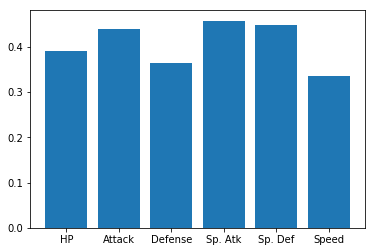

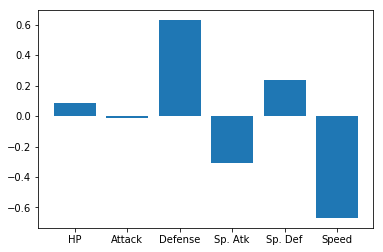

In [16]:
import matplotlib.pyplot as plt

for p in pca.components_:
    plt.bar(colsElegidas, p)
    plt.show()

In [18]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

fig = {
    'data': [
        {
            'x': df[df['Type 1']==pokeType]['pca_1'],
            'y': df[df['Type 1']==pokeType]['pca_2'],
            'text' : df[df['Type 1']==pokeType]["Name"],
            'name': pokeType, 'mode': 'markers',
        } for pokeType in df["Type 1"].unique()
    ],
    'layout': {
        'xaxis': {'title': 'PCA 1'},
        'yaxis': {'title': "PCA 2"}
    }
}

iplot(fig)

## Ahora con imágenes

In [88]:
#!wget -q https://gitlab.com/i3a/datasets/raw/master/datasets/pokemon-images.zip -O datasets/pokemon-images.zip
#!ls datasets
#!unzip -o datasets/pokemon-images.zip -d datasets/

In [19]:
from glob import glob
from pathlib import Path

fileList = glob("datasets/pokemon-images/*.png")
imgs = []
img_names = []
for i, f in enumerate(fileList):
    img_names.append(Path(f).stem)
    img = plt.imread(f)
    imgs.append(img)
    
imgs = np.array(imgs)
imgs.shape

(825, 256, 256, 4)

In [20]:
imgs = imgs[:, :, :, 0:3]
imgs.shape


(825, 256, 256, 3)

In [21]:
imgs = imgs.reshape( imgs.shape[0], imgs.shape[1] * imgs.shape[2] * imgs.shape[3]  )
imgs.shape

(825, 196608)

In [22]:
display(np.min(imgs))
display(np.max(imgs))
display(np.mean(imgs))

0.0

1.0

0.22697093

In [23]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
#pca = PCA(n_components=20)
# pca = PCA(0.9)
pca.fit( imgs )

display("Varianza por componente:", pca.explained_variance_ratio_)
display("Varianza explicada:",np.sum(pca.explained_variance_ratio_))
display("Cantidad de componentes", len(pca.components_))

'Varianza por componente:'

array([1.21869825e-01, 5.34635000e-02, 4.12580408e-02, 3.93057428e-02,
       2.89052520e-02, 2.48580612e-02, 2.17304770e-02, 1.78737286e-02,
       1.48046622e-02, 1.40544856e-02, 1.34486910e-02, 1.30226491e-02,
       1.21132340e-02, 1.14394138e-02, 1.11428918e-02, 1.05943354e-02,
       9.51443799e-03, 9.14067496e-03, 8.36152770e-03, 8.14499334e-03,
       7.22238515e-03, 7.05451285e-03, 6.94006961e-03, 6.73487736e-03,
       6.48395019e-03, 5.82372909e-03, 5.77923143e-03, 5.55155566e-03,
       5.15742181e-03, 5.10630338e-03, 4.99417400e-03, 4.87765623e-03,
       4.78562713e-03, 4.59293695e-03, 4.29967372e-03, 4.11166903e-03,
       4.08206554e-03, 4.03380860e-03, 3.84338293e-03, 3.81254847e-03,
       3.70892184e-03, 3.54882726e-03, 3.50324251e-03, 3.45605286e-03,
       3.37241846e-03, 3.24852392e-03, 3.18269152e-03, 3.15808482e-03,
       3.06483335e-03, 2.99841515e-03, 2.91328900e-03, 2.86546513e-03,
       2.83255614e-03, 2.76362849e-03, 2.72887922e-03, 2.68762745e-03,
      

'Varianza explicada:'

1.0000001

'Cantidad de componentes'

825

In [24]:
def aplicarPCA(v, nComponentes=-1):
    transformedPikachu = pca.transform( v )[0]
    
    if isinstance(nComponentes,int) and nComponentes > -1:
        transformedPikachu[nComponentes:] = 0
    elif isinstance(nComponentes,list):
        transformedPikachu[ nComponentes ] = 0
    
    return pca.inverse_transform(transformedPikachu)
    
def yoTeElijo(nombre, nComponentes=-1):
    keyPikachu = str(int(df[ df.Name == nombre ]["#"]))
    imgsIndexes = list(map(lambda x: x[x.rfind("/")+1:-4], fileList ))

    return aplicarPCA([ imgs[ imgsIndexes.index(keyPikachu) ] ], nComponentes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


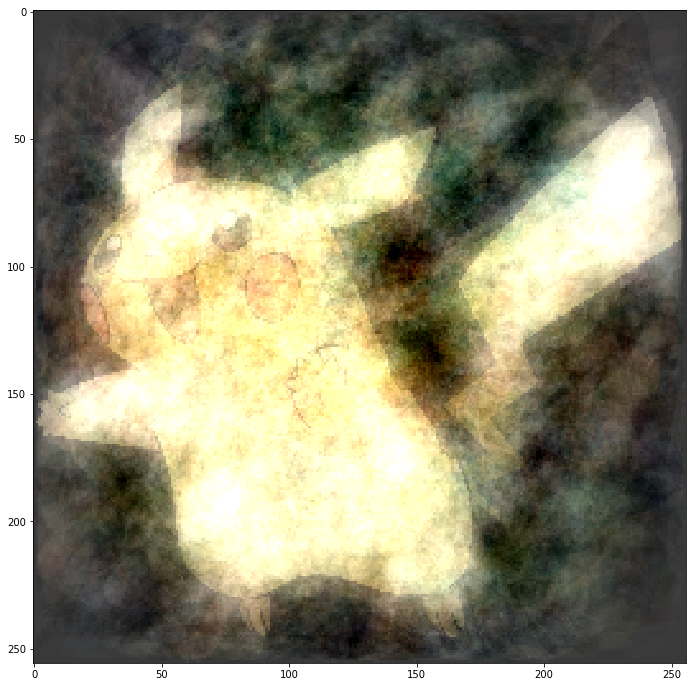

In [36]:
plt.figure(figsize=(12,12))
plt.imshow( yoTeElijo("Pikachu", 100).reshape( 256, 256, 3 ) + np.mean(imgs) )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


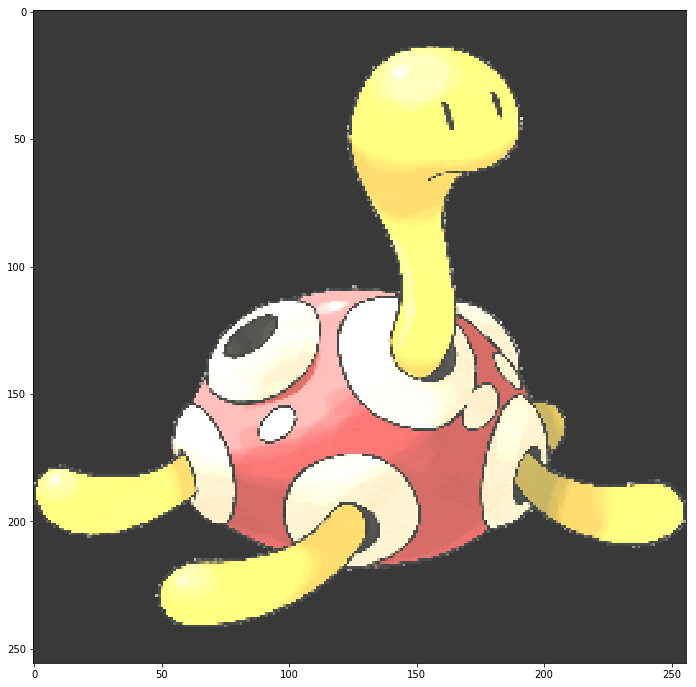

In [37]:
plt.figure(figsize=(12,12))
plt.imshow( yoTeElijo("Shuckle").reshape( 256, 256, 3 ) + np.mean(imgs) )

array([15, 12, 12, 12, 18, 10, 13, 19, 17, 13])

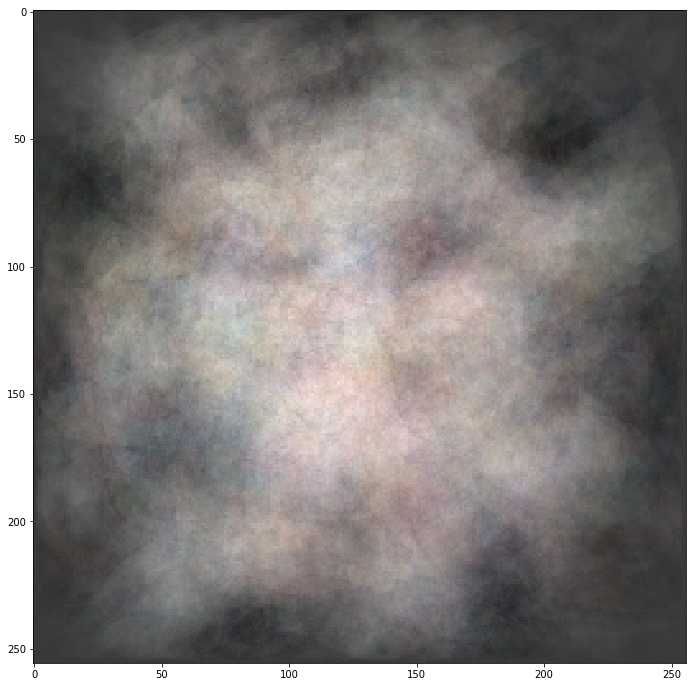

In [382]:
cantComps = 20
comps = np.ones( len(pca.components_) , dtype=bool)
comps[ np.random.randint(0,len(pca.components_), cantComps) ] = False
comps = list(comps)

plt.figure(figsize=(12,12))
plt.imshow( yoTeElijo("Pikachu",comps).reshape( 256, 256, 3 ) + np.mean(imgs) )

## t-SNE

In [46]:
import numpy as np
from sklearn.manifold import TSNE

tsneResult = TSNE(n_components=2).fit_transform( df[colsElegidas] )
tsneResult.shape

(800, 2)

In [48]:
df["tsne_1"] = tsneResult[:,0]
df["tsne_2"] = tsneResult[:,1]

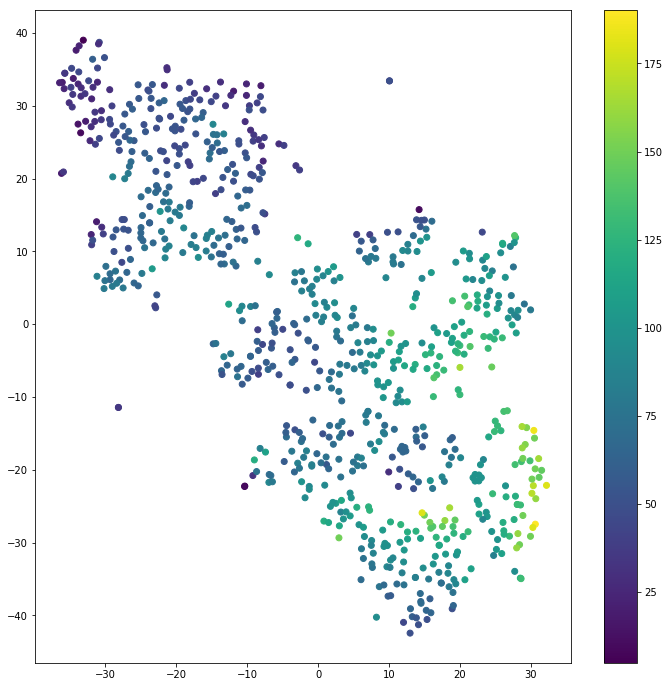

In [58]:
plt.figure(figsize=(12,12))
plt.scatter(df["tsne_1"], df["tsne_2"], c = df["Attack"] )
plt.colorbar()

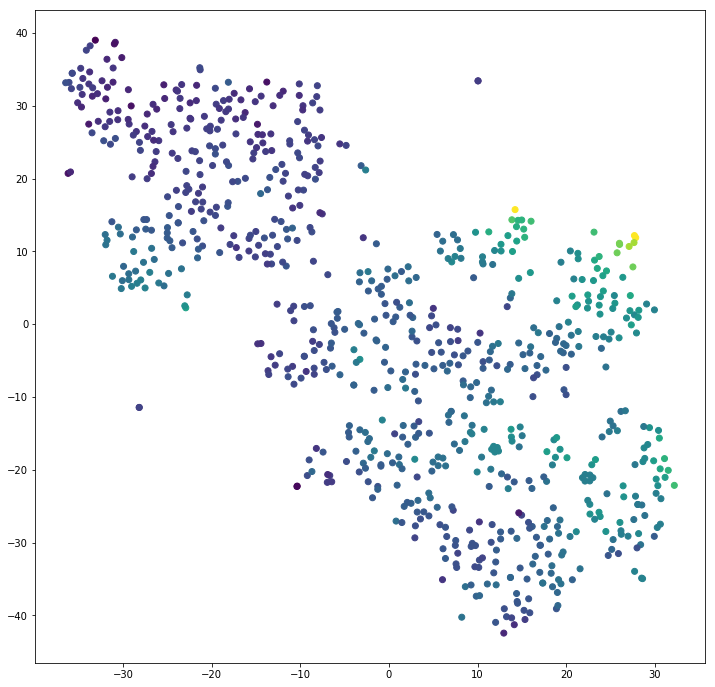

In [57]:
plt.figure(figsize=(12,12))
plt.scatter(df["tsne_1"], df["tsne_2"], c = df["Defense"] )

## Clustering

### K-Means

In [46]:
from sklearn.cluster import KMeans
import numpy as np

nClusters = 4

kmeans = KMeans(n_clusters=nClusters, random_state=140).fit( df[colsElegidas] )

df["cluster"] = 0
df["cluster"] = kmeans.labels_

#kmeans.predict([[0, 0], [12, 3]])
#kmeans.cluster_centers_

(array([374.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 426.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

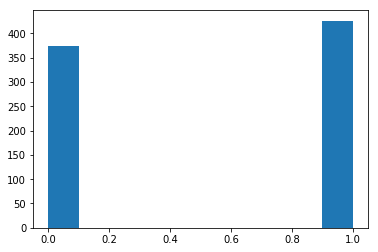

In [44]:
plt.hist(df["cluster"])


In [47]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

fig = {
    'data': [
        {
            'x': df[df['cluster']==cluster]['pca_1'],
            'y': df[df['cluster']==cluster]['pca_2'],
            'text' : df[df['cluster']==cluster]["#"],
            'name': "Cluster "+ str(cluster), 'mode': 'markers',
        } for cluster in df["cluster"].unique()
    ],
    'layout': {
        'xaxis': {'title': 'PCA 1'},
        'yaxis': {'title': "PCA 2"}
    }
}

iplot(fig)

In [29]:
df[df["cluster"] == 0][colsElegidas].describe()

HP      Attack     Defense     Sp. Atk     Sp. Def       Speed
count  279.000000  279.000000  279.000000  279.000000  279.000000  279.000000
mean    50.035842   53.684588   51.505376   47.799283   49.096774   49.462366
std     14.772086   18.842231   18.055444   17.530319   15.606029   19.157747
min      1.000000    5.000000    5.000000   10.000000   20.000000   10.000000
25%     40.000000   40.000000   40.000000   35.000000   40.000000   35.000000
50%     50.000000   53.000000   50.000000   45.000000   50.000000   50.000000
75%     59.000000   65.000000   60.000000   60.000000   55.500000   64.000000
max    115.000000  125.000000  100.000000  125.000000  120.000000  100.000000

In [48]:
df[df["cluster"] == 3][colsElegidas].describe()

HP      Attack     Defense     Sp. Atk     Sp. Def       Speed
count  144.000000  144.000000  144.000000  144.000000  144.000000  144.000000
mean    85.298611  110.451389   90.618056  120.097222   97.479167   98.277778
std     20.373121   33.104587   22.033667   26.499062   21.846242   22.957377
min     50.000000   30.000000   20.000000   54.000000   20.000000   20.000000
25%     70.000000   89.000000   74.250000  102.250000   85.000000   86.000000
50%     80.000000  105.000000   90.000000  120.000000   95.000000  100.000000
75%    100.000000  132.500000  105.000000  135.000000  107.750000  110.000000
max    150.000000  190.000000  160.000000  194.000000  160.000000  180.000000

In [31]:
df[df["cluster"] == 2][colsElegidas].describe()

HP      Attack     Defense     Sp. Atk     Sp. Def       Speed
count  108.000000  108.000000  108.000000  108.000000  108.000000  108.000000
mean    70.120370   91.731481  123.175926   64.259259   88.092593   50.805556
std     18.820707   27.665764   30.975972   20.467147   33.565541   20.176538
min     20.000000   10.000000   70.000000   10.000000   40.000000    5.000000
25%     60.000000   75.000000  102.750000   50.000000   65.000000   36.000000
50%     70.000000   90.000000  118.500000   60.000000   80.000000   50.000000
75%     80.000000  108.250000  131.500000   76.000000  105.000000   65.000000
max    120.000000  185.000000  230.000000  130.000000  230.000000   99.000000